Load the data

In [1]:
import pandas as pd
import matplotlib

In [5]:
df = pd.read_csv("World Happiness Report.csv")
df.head()

,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       153 non-null    object 
 1   Happiness Rank                153 non-null    int64  
 2   GDP per capita                153 non-null    float64
 3   Social support                153 non-null    float64
 4   Healthy life expectancy       153 non-null    float64
 5   Freedom to make life choices  153 non-null    float64
 6   Generosity                    153 non-null    float64
 7   Perceptions of corruption     153 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.7+ KB


Histogram Showing happiness Scores

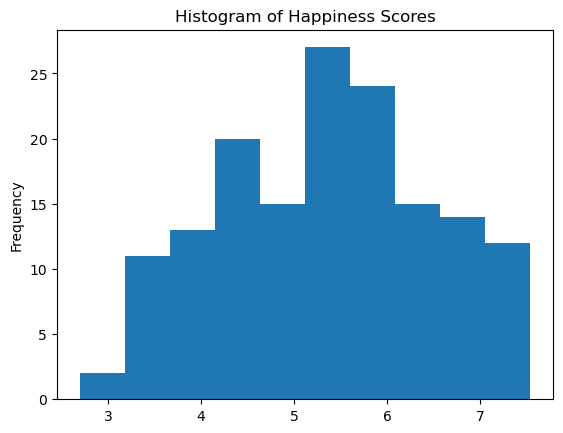

In [7]:
happiness_hist = df['Happiness Score'].plot(kind = 'hist', xlabel = 'Happiness Score', title = 'Histogram of Happiness Scores')

Create a horizontal bar chart with the combined top 10 and bottom 10 countries.

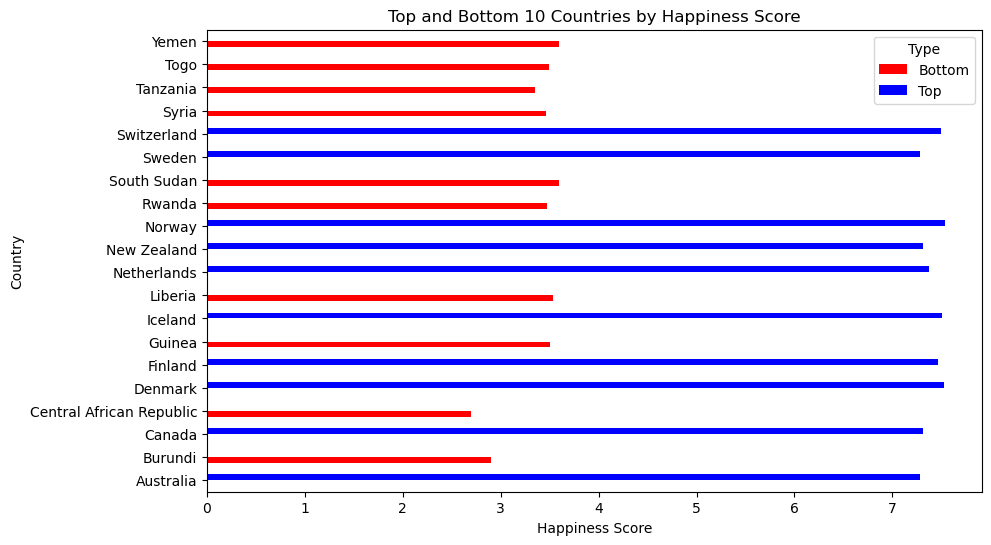

In [9]:
# Extract top and bottom 10 countries based on happiness score
top_10 = df.head(10)[['Country', 'Happiness Score']]
bottom_10 = df.tail(10)[['Country', 'Happiness Score']]

# Create a new column to differentiate between top and bottom countries
top_10['Type'] = 'Top'
bottom_10['Type'] = 'Bottom'

# Combine the two dataframes into one
combined = pd.concat([top_10, bottom_10])

# Pivot the dataframe to have country names as index and type as columns
pivot_df = combined.pivot(index='Country', columns='Type', values='Happiness Score')

# Write your code here
happiness_gap_chart = pivot_df.plot(kind = 'barh', xlabel = 'Happiness Score', ylabel = 'Country', title = 'Top and Bottom 10 Countries by Happiness Score', color = ['red', 'blue'], figsize = (10,6))



Create a horizontal bar chart with the combined top 5 and bottom 5 countries sorted by generosity.

Text(0.5, 1.0, 'Happiness Score of Top and Bottom 5 Countries by Generosity')

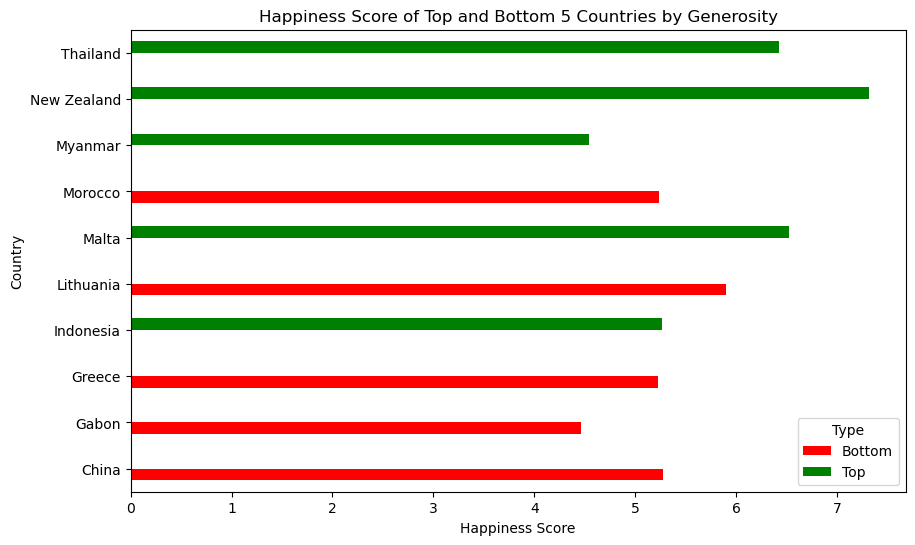

In [11]:
# Sort by generosity
df_by_generosity = df.sort_values('Generosity')[['Country', 'Happiness Score']]

# Extract top 5 and bottom 5 countries
top_5 = df_by_generosity.copy().tail(5)
bottom_5 = df_by_generosity.copy().head(5)

top_5.loc[:, 'Type'] = 'Top'
bottom_5.loc[:, 'Type'] = 'Bottom'

# Combine the two dataframes into one
combined = pd.concat([top_5, bottom_5])

# Pivot the dataframe to have country names as index and type as columns
generosity_pivot_df = combined.pivot(index='Country', columns='Type', values='Happiness Score')

# Write your code here
generosity_gap_chart = generosity_pivot_df.plot(kind = 'barh', color = ['red', 'green'],figsize = (10,6))
generosity_gap_chart.set_xlabel("Happiness Score")
generosity_gap_chart.set_ylabel("Country")
generosity_gap_chart.set_title("Happiness Score of Top and Bottom 5 Countries by Generosity")

Create a pie chart showing the proportion of GDP and health life in the happiness contribution.

Text(0.5, 1.0, 'Contribution of GDP per capita and healthy life expectancy to the happiness score of the top 10 happiest countries')

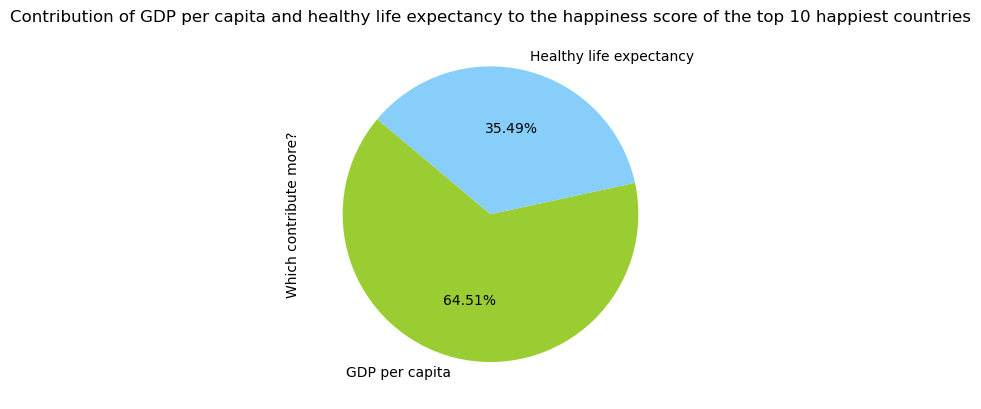

In [12]:
# Get the top 10 happiest countries
top_10 = df.head(10)

# Calculate the total contribution of GDP per capita and healthy life expectancy to the happiness score
total_gdp = top_10['GDP per capita'].sum()
total_life_expectancy = top_10['Healthy life expectancy'].sum()

# Calculate the percentage contribution of GDP per capita and healthy life expectancy to the happiness score
gdp_percent = total_gdp / (total_gdp + total_life_expectancy) * 100
life_expectancy_percent = total_life_expectancy / (total_gdp + total_life_expectancy) * 100


GDP_vs_health_percent = pd.Series([gdp_percent, life_expectancy_percent], index=['GDP per capita', 'Healthy life expectancy'])

# Write your code here
GDP_vs_health_pie = GDP_vs_health_percent.plot(kind = 'pie' , label ='Which contribute more?' ,autopct = '%1.2f%%', colors = ['yellowgreen', 'lightskyblue'], startangle = 140)
GDP_vs_health_pie.set_title ('Contribution of GDP per capita and healthy life expectancy to the happiness score of the top 10 happiest countries')


Create a pie chart showing the proportion of each factor in the happiness contribution.

Text(0.5, 1.0, 'Percentage breakdown of factors contributing to happiness')

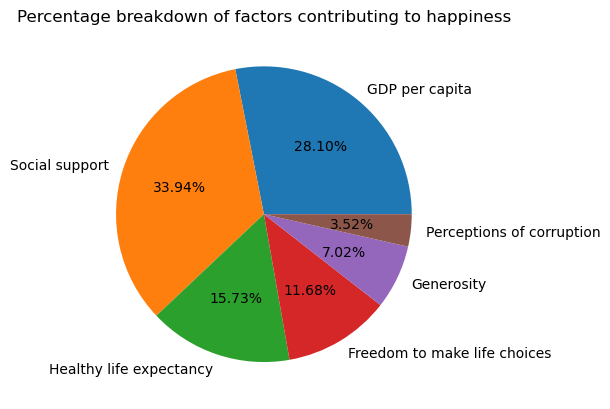

In [18]:
# Create a list of labels for the pie chart
labels = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create a list of values of sums for the pie chart
values = df.iloc[:, 2:9].sum().tolist()

factors_percent = pd.Series(values, index=labels)

# Write your code here
factors_pie = factors_percent.plot(kind = 'pie', autopct = '%1.2f%%')
factors_pie.set_title('Percentage breakdown of factors contributing to happiness')

Create a horizontal stacked bar chart showing contribution of each factor in happiness of top 10 happiest countries.

Text(0.5, 1.0, 'Contribution of factors to the happiness score of the top 10 happiest countries')

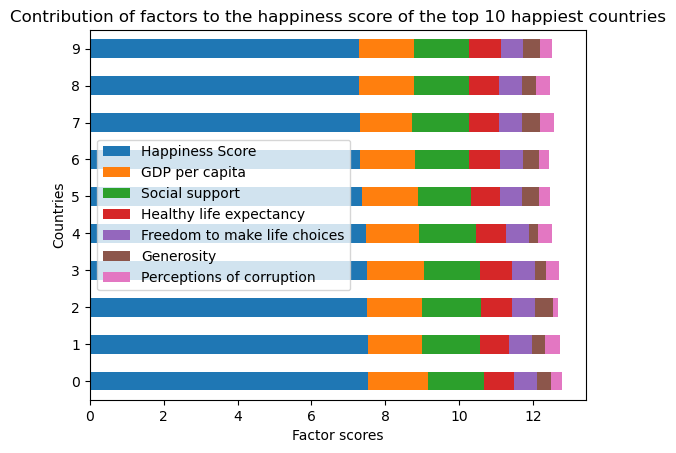

In [17]:
# Create a new dataframe with the top 10 happiest countries and their corresponding factor scores
top_10_factors = df.head(10)

# Write your code here
top_10_factors_contribution_chart = top_10_factors.plot(kind = 'barh',stacked = True,  xlabel= 'Factor scores', ylabel = 'Countries')
top_10_factors_contribution_chart.set_title('Contribution of factors to the happiness score of the top 10 happiest countries')